## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Feb. 20, 2018 by 3:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns #plt.style.use("seaborn")
%matplotlib inline

### Data Cleaning

In [135]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
all_data = pd.concat((test, train), ignore_index=True)

In [137]:
all_data.shape

(2919, 81)

In [101]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010


In [102]:
train.dropna(thresh=int(len(train)*.5), axis=1, inplace=True) #drops columns with more than 50% NANs

After looping through the dataframe and printing out the value counts of object columns, I was able to identify which columns and values were worth keeping based on categorical distributions and data availability. 

In [143]:
#exclude from final draft
dropped = []
for i in train:
    if train[i].dtype == 'object':
        # print(train[i].value_counts(normalize=True))
        if train[i].value_counts(normalize=True).iloc[0] > .75:
            print(train[i].value_counts(normalize=True))
            dropped.append(i)
            # REMEMBER THE NaNS!!!!

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64
Norm      0.989726
Feedr     0.004110
RRNn      0.001370
PosN      0.001370
Artery    0.001370
RRAn      0.000685
RRAe      0.000685
PosA      0.000685
Name: Condition2, dtype: float64
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64
CompShg    0.982192
Tar&

In [144]:
dropped

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

**Columns to transform:**
- 'MSZoning' consolidate residential variables and get dummies for residential, fv residential, and commercial zones
- 'Condition1' change to indicator for normal, near railroad, and near positive feature
- 'ExterQual' change to integer scale
- 'ExterCond' change to integer scale
- 'BsmtQual' change to integer scale
- 'BsmtCond' change to integer scale
- 'HeatingQC' change to integer scale
- 'KitchenQual' change to integer scale
- 'Functional' change to dummy for 'typical'
- 'GarageFinish' change to dummy for 'finished' garage
- 'SaleCondition' change to dummies for 'normal and 'abnormal' (i.e. shortsale, forclosure, etc...) sales

**Extraneous columns to delete:**

LandContour, Utilities, LandSlope, Condition2, HouseStyle (total sq ft as proxy), RoofStyle (because nobody cares), RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, BsmtExposure, BsmtFinType1, BsmtFinType1, Heating, CentralAir, Electrical, FireplaceQu, GarageQual, GarageCond, GarageType, PavedDrive, SaleType, MiscVal, LotConfig

In [127]:
#creates binary indicators for houses with normal conditions, located near railroads, & positive features (like parks)
train["Norm_conditions"] = np.where(train["Condition1"].str.contains("Norm"), 1, 0)
train["Near_railroad"] = np.where(train["Condition1"].str.contains("RR"), 1, 0)
train["Near_pos_feat"] = np.where(train["Condition1"].str.contains("Pos"), 1, 0)

#creates binary indicator for a home with normal functionality; homes with normal functionality = 1
train["Norm_functionality"] = np.where(train.Functional.str.contains("Typ"), 1, 0)

#creates binary indicators for homes that sold under normal and abnormal (i.e. shortsale or forclosure) conditions
train["Norm_sale"] = np.where(train.SaleCondition.str.contains("Normal"), 1, 0) # 1 = normal
train["Abnorm_sale"] = np.where(train.SaleCondition.str.contains("Abnorml"), 1, 0) # 1 = abnormal

#encodes 'GarageFinish' column to an indicator for houses with finished garages instead of categories
train.GarageFinish = train.GarageFinish.apply(lambda x: 1 if str(x)[0:3] == "Fin" else 0)


In [142]:
#consolidates residential variables
train.MSZoning = train.MSZoning.apply(lambda x: x[0] if x[0] == "R" else x)

#creates dummy columns for residential, floating village residential, and commercial zones
train[['Zone_Res', 'Zone_FVRes', 'Zone_Com']] = pd.get_dummies(train, 
                                                columns=["MSZoning"])[['MSZoning_R','MSZoning_FV','MSZoning_C (all)']]

#consolidates irregular lot shape variables to a single variable
train.LotShape = train.LotShape.apply(lambda x: x[0:2] if x[0:2]=="IR" else x)
#creates dummies for regular and irregularly shaped lots
train[["Shape_Reg", "Shape_Irreg"]] = pd.get_dummies(train, columns=["LotShape"])[["LotShape_Reg","LotShape_IR"]]

#removes MSZoning and Lotshape from dataframe
train.drop(["MSZoning", "LotShape"], axis=1, inplace=True)

In [128]:
#dictionary assigning numeric values to categorical columns
num_assignments = {"ExterQual": {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0},
                  "ExterCond": {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0},
                  "BsmtQual": {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0},
                  "BsmtCond": {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0},
                  "HeatingQC": {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0},
                  "KitchenQual": {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0}}
#uses the 'num_assignments' dictionary to assign numeric values to the specified columns
train.replace(num_assignments, inplace=True)

In [129]:
#drop 'Street' since only 6 gravel roads
#other values in 'Condition1', 'Functional', and 'SaleCondition' columns were numerically insignificant
train.drop(["Street","Condition1","Functional","SaleCondition"], axis=1, inplace=True) 

In [130]:
# come up with standard process/metric for dropping columns (refer to )
# drops variables that are irrelevant or have plausible proxy columns (i.e. Total Sqaure Feet proxies for 'HousingStyle')
train.drop(["LandContour", "Utilities", "LandSlope", "Condition2", "HouseStyle", "RoofStyle", "RoofMatl", 
            "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "BsmtExposure", "BsmtFinType1", "BsmtFinType1",
            "Heating", "CentralAir", "Electrical", "FireplaceQu", "GarageQual", "GarageCond", "GarageType",
            "PavedDrive", "SaleType", "MiscVal", "LotConfig"], axis=1, inplace=True)

In [131]:
# creates variable measuring total square feet of the house
train["TotalSqFt"] = train.TotalBsmtSF + train.GrLivArea
# TotalBsmtSF = Total square feet of basement area
# GrLivArea = Total above grade (ground) living area square feet

In [136]:
train.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id                    1460 non-null int64
MSSubClass            1460 non-null int64
LotFrontage           1201 non-null float64
LotArea               1460 non-null int64
Alley                 91 non-null object
LotConfig             1460 non-null object
Neighborhood          1460 non-null object
BldgType              1460 non-null object
OverallQual           1460 non-null int64
OverallCond           1460 non-null int64
YearBuilt             1460 non-null int64
YearRemodAdd          1460 non-null int64
MasVnrArea            1452 non-null float64
ExterQual             1460 non-null int64
ExterCond             1460 non-null int64
BsmtQual              1423 non-null float64
BsmtCond              1423 non-null float64
BsmtFinSF1            1460 non-null int64
BsmtFinType2          1422 non-null object
BsmtFinSF2            1460 non-null int64
BsmtUnfSF             1460 non-null int64


(array([    0.,   200.,   400.,   600.,   800.,  1000.]),
 <a list of 6 Text yticklabel objects>)

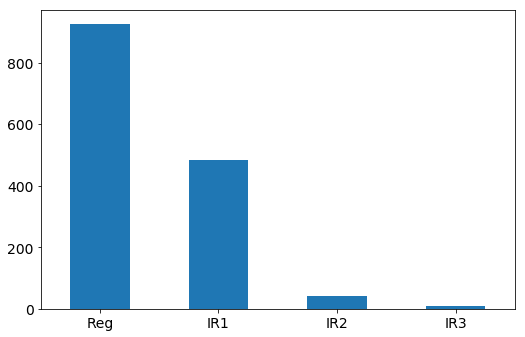

In [8]:
train.LotShape.value_counts().plot(kind='bar',rot=0, figsize=(8.5,5.5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

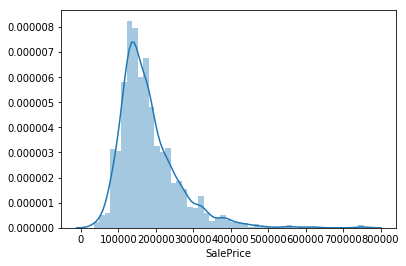

In [9]:
sns.distplot(train.SalePrice) #regularize

TotalBsmtSF: Total square feet of basement area
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet

-create dummies for MSZoning (6 zones), Street (gravel or paved)


In [41]:
numeric_feats = [all_data.dtypes[all_data.dtypes != "object"]]
#similar to: numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats[:]

[1stFlrSF           int64
 2ndFlrSF           int64
 3SsnPorch          int64
 BedroomAbvGr       int64
 BsmtFinSF1       float64
 BsmtFinSF2       float64
 BsmtFullBath     float64
 BsmtHalfBath     float64
 BsmtUnfSF        float64
 EnclosedPorch      int64
 Fireplaces         int64
 FullBath           int64
 GarageArea       float64
 GarageCars       float64
 GarageYrBlt      float64
 GrLivArea          int64
 HalfBath           int64
 Id                 int64
 KitchenAbvGr       int64
 LotArea            int64
 LotFrontage      float64
 LowQualFinSF       int64
 MSSubClass         int64
 MasVnrArea       float64
 MiscVal            int64
 MoSold             int64
 OpenPorchSF        int64
 OverallCond        int64
 OverallQual        int64
 PoolArea           int64
 SalePrice        float64
 ScreenPorch        int64
 TotRmsAbvGrd       int64
 TotalBsmtSF      float64
 WoodDeckSF         int64
 YearBuilt          int64
 YearRemodAdd       int64
 YrSold             int64
 dtype: obje

### Linear Regression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train, train.SalePrice, test_size=0.33, random_state=42)

In [38]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
price_predict = regr.predict(X_test)

ValueError: could not convert string to float: 'Normal'

482